In [2]:
# Load dataset
import pandas as pd
df = pd.read_csv("/content/healthcare_dataset.csv")

In [3]:
# 1. Rename columns (replace spaces with underscores)
df.columns = df.columns.str.strip().str.replace(' ', '_')

In [4]:
# 2. Convert date columns to datetime
df['Date_of_Admission'] = pd.to_datetime(df['Date_of_Admission'])
df['Discharge_Date'] = pd.to_datetime(df['Discharge_Date'])

In [6]:
# 3. Standardize text columns to title case
text_cols = ['Name', 'Gender', 'Blood_Type', 'Medical_Condition',
             'Doctor', 'Hospital', 'Insurance_Provider', 'Admission_Type',
             'Medication', 'Test_Results']

for col in text_cols:
    df[col] = df[col].str.title()

In [7]:
# 4. Check for negative or zero billing amounts (shouldn't exist)
print("Negative Billing Amounts:", df[df['Billing_Amount'] <= 0].shape[0])

Negative Billing Amounts: 108


In [8]:
# 5. Ensure Discharge Date is after Admission Date
invalid_dates = df[df['Discharge_Date'] < df['Date_of_Admission']]
print("Invalid discharge dates:", invalid_dates.shape[0])

Invalid discharge dates: 0


In [10]:
df.shape

(55500, 15)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                55500 non-null  object        
 1   Age                 55500 non-null  int64         
 2   Gender              55500 non-null  object        
 3   Blood_Type          55500 non-null  object        
 4   Medical_Condition   55500 non-null  object        
 5   Date_of_Admission   55500 non-null  datetime64[ns]
 6   Doctor              55500 non-null  object        
 7   Hospital            55500 non-null  object        
 8   Insurance_Provider  55500 non-null  object        
 9   Billing_Amount      55500 non-null  float64       
 10  Room_Number         55500 non-null  int64         
 11  Admission_Type      55500 non-null  object        
 12  Discharge_Date      55500 non-null  datetime64[ns]
 13  Medication          55500 non-null  object    

In [12]:
df.head()

,Name,Age,Gender,Blood_Type,Medical_Condition,Date_of_Admission,Doctor,Hospital,Insurance_Provider,Billing_Amount,Room_Number,Admission_Type,Discharge_Date,Medication,Test_Results
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons And Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook Plc,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers And Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,Adrienne Bell,43,Female,Ab+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [13]:
df.describe(include='all')

,Name,Age,Gender,Blood_Type,Medical_Condition,Date_of_Admission,Doctor,Hospital,Insurance_Provider,Billing_Amount,Room_Number,Admission_Type,Discharge_Date,Medication,Test_Results
count,55500,55500.000000,55500,55500,55500,55500,55500,55500,55500,55500.000000,55500.000000,55500,55500,55500,55500
unique,40235,NaN,2,8,6,NaN,40341,39876,5,NaN,NaN,3,NaN,5,3
top,Michael Williams,NaN,Male,A-,Arthritis,NaN,Michael Smith,Llc Smith,Cigna,NaN,NaN,Elective,NaN,Lipitor,Abnormal
freq,24,NaN,27774,6969,9308,NaN,27,44,11249,NaN,NaN,18655,NaN,11140,18627
mean,NaN,51.539459,NaN,NaN,NaN,2021-11-01 01:02:22.443243008,NaN,NaN,NaN,25539.316097,301.134829,NaN,2021-11-16 13:15:20.821621504,NaN,NaN
min,NaN,13.000000,NaN,NaN,NaN,2019-05-08 00:00:00,NaN,NaN,NaN,-2008.492140,101.000000,NaN,2019-05-09 00:00:00,NaN,NaN
25%,NaN,35.000000,NaN,NaN,NaN,2020-07-28 00:00:00,NaN,NaN,NaN,13241.224652,202.000000,NaN,2020-08-12 00:00:00,NaN,NaN
50%,NaN,52.000000,NaN,NaN,NaN,2021-11-01 00:00:00,NaN,NaN,NaN,25538.069376,302.000000,NaN,2021-11-17 00:00:00,NaN,NaN
75%,NaN,68.000000,NaN,NaN,NaN,2023-02-03 00:00:00,NaN,NaN,NaN,37820.508436,401.000000,NaN,2023-02-18 00:00:00,NaN,NaN
max,NaN,89.000000,NaN,NaN,NaN,2024-05-07 00:00:00,NaN,NaN,NaN,52764.276736,500.000000,NaN,2024-06-06 00:00:00,NaN,NaN


In [15]:
# Adding Length of Stay
df['Stay_Length'] = (df['Discharge_Date'] - df['Date_of_Admission']).dt.days


**Demography patters**

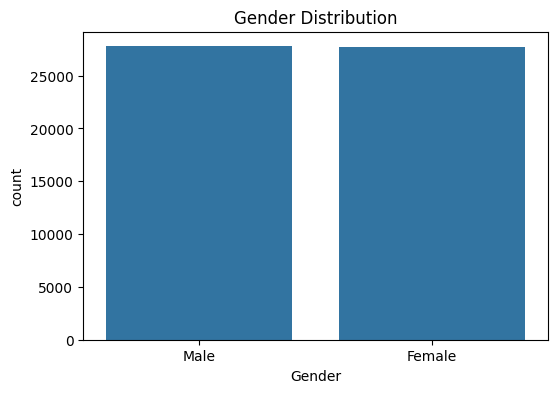

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender')
plt.title("Gender Distribution")
plt.show()

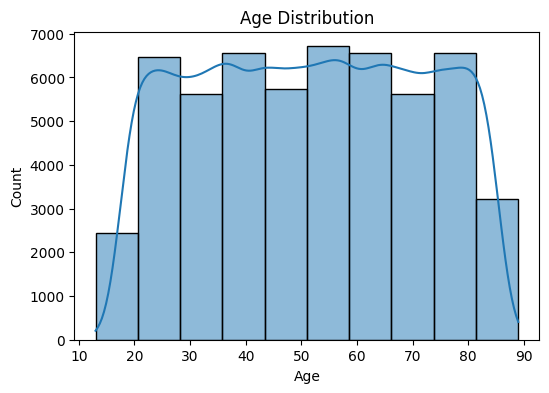

In [17]:
plt.figure(figsize=(6,4))
df['Age'] = df['Age'].astype(int)  # ensure numeric
sns.histplot(df['Age'], bins=10, kde=True)
plt.title("Age Distribution")
plt.show()

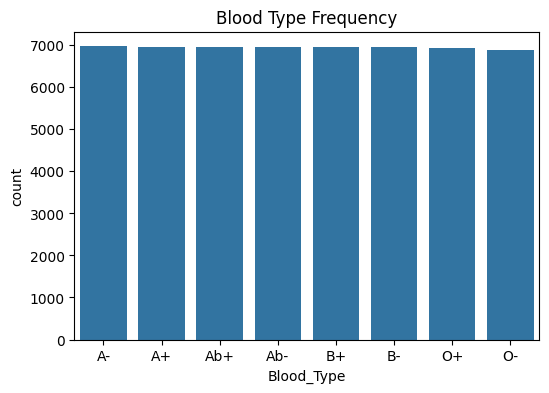

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Blood_Type', order=df['Blood_Type'].value_counts().index)
plt.title("Blood Type Frequency")
plt.show()

**Medical condition Patterns**

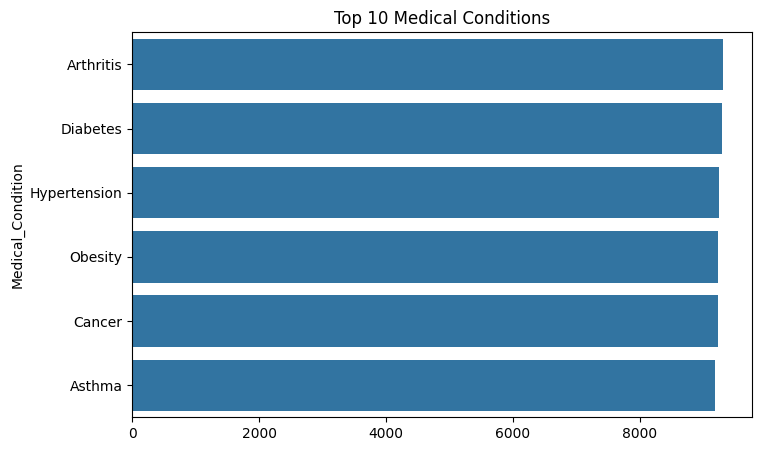

In [19]:
plt.figure(figsize=(8,5))
top_conditions = df['Medical_Condition'].value_counts().head(10)
sns.barplot(x=top_conditions.values, y=top_conditions.index)
plt.title("Top 10 Medical Conditions")
plt.show()


**Hospital and doctor performance**

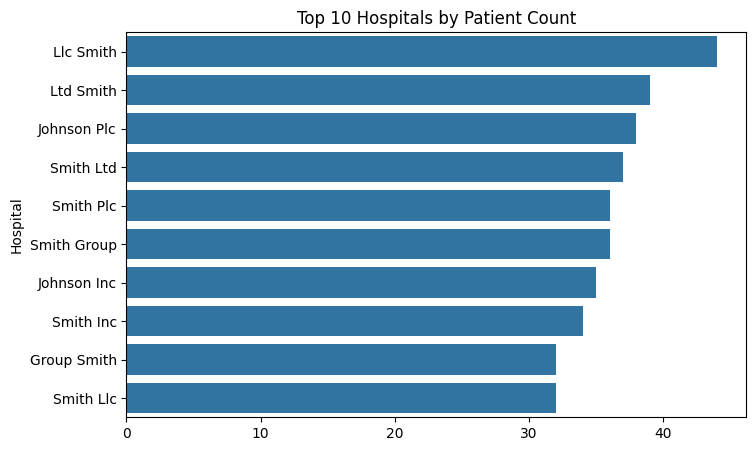

In [20]:
plt.figure(figsize=(8,5))
top_hospitals = df['Hospital'].value_counts().head(10)
sns.barplot(x=top_hospitals.values, y=top_hospitals.index)
plt.title("Top 10 Hospitals by Patient Count")
plt.show()

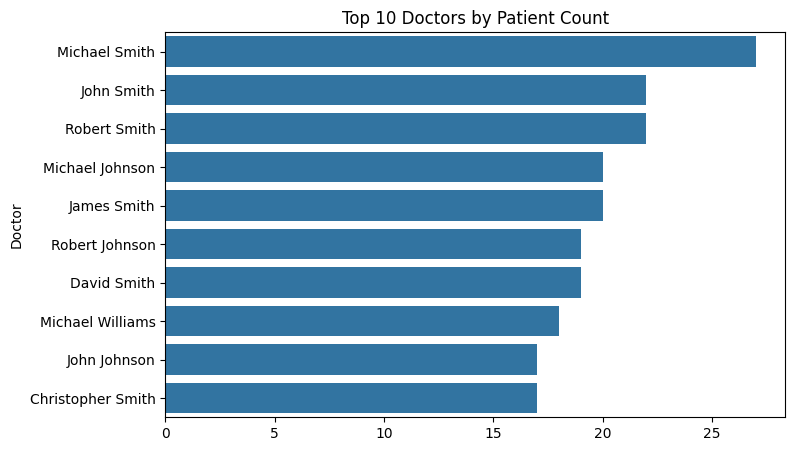

In [21]:
plt.figure(figsize=(8,5))
top_doctors = df['Doctor'].value_counts().head(10)
sns.barplot(x=top_doctors.values, y=top_doctors.index)
plt.title("Top 10 Doctors by Patient Count")
plt.show()


**Financial patterns**

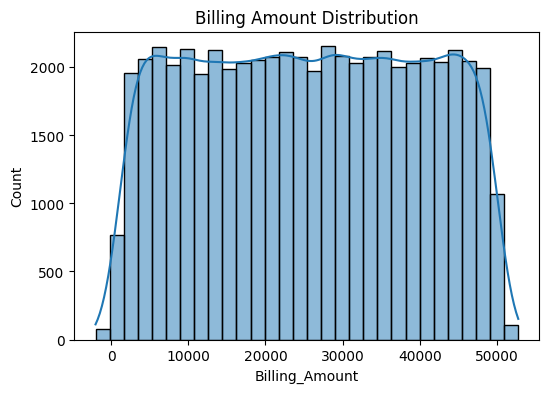

In [22]:
plt.figure(figsize=(6,4))
sns.histplot(df['Billing_Amount'], bins=30, kde=True)
plt.title("Billing Amount Distribution")
plt.show()

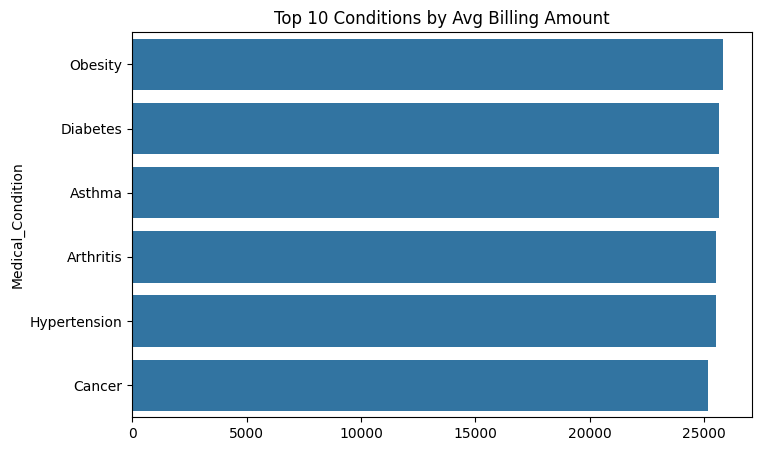

In [23]:
plt.figure(figsize=(8,5))
avg_billing_condition = df.groupby('Medical_Condition')['Billing_Amount'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_billing_condition.values, y=avg_billing_condition.index)
plt.title("Top 10 Conditions by Avg Billing Amount")
plt.show()


**Time based trends**

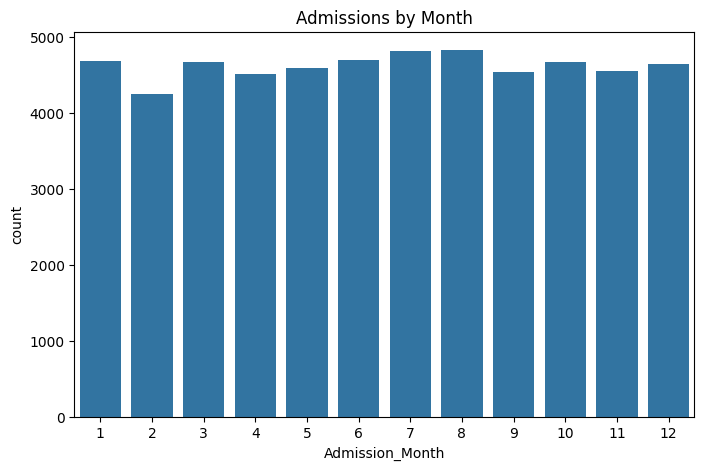

In [24]:
plt.figure(figsize=(8,5))
df['Admission_Month'] = df['Date_of_Admission'].dt.month
sns.countplot(data=df, x='Admission_Month')
plt.title("Admissions by Month")
plt.show()

**Bivarient analysis**

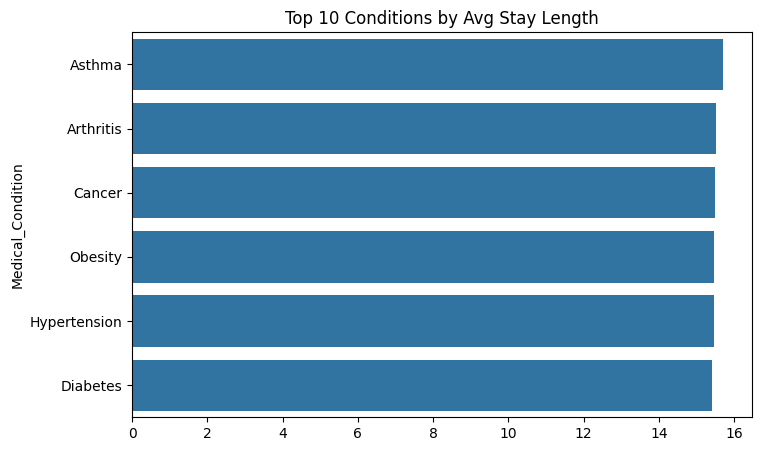

In [32]:
# 1 Medical Condition vs Average Stay Length
plt.figure(figsize=(8,5))
avg_stay_by_condition = df.groupby('Medical_Condition')['Stay_Length'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_stay_by_condition.values, y=avg_stay_by_condition.index)
plt.title("Top 10 Conditions by Avg Stay Length")
plt.show()

/tmp/ipython-input-3842128799.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_billing_by_age_group = df.groupby('Age_Group')['Billing_Amount'].mean().reset_index()


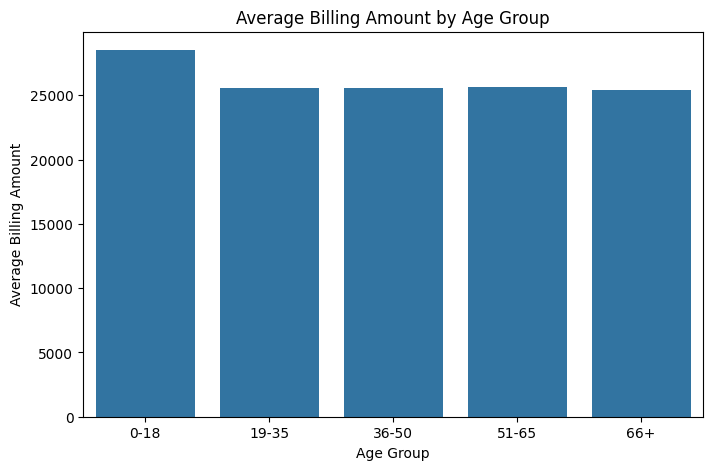

In [35]:
# 2 Age Group vs Billing Amount (Bar Chart Version)
# Create Age Groups
bins = [0, 18, 35, 50, 65, 100]
labels = ['0-18', '19-35', '36-50', '51-65', '66+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calculate average billing for each group
avg_billing_by_age_group = df.groupby('Age_Group')['Billing_Amount'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(8,5))
sns.barplot(data=avg_billing_by_age_group, x='Age_Group', y='Billing_Amount')
plt.title("Average Billing Amount by Age Group")
plt.ylabel("Average Billing Amount")
plt.xlabel("Age Group")
plt.show()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                55500 non-null  object        
 1   Age                 55500 non-null  int64         
 2   Gender              55500 non-null  object        
 3   Blood_Type          55500 non-null  object        
 4   Medical_Condition   55500 non-null  object        
 5   Date_of_Admission   55500 non-null  datetime64[ns]
 6   Doctor              55500 non-null  object        
 7   Hospital            55500 non-null  object        
 8   Insurance_Provider  55500 non-null  object        
 9   Billing_Amount      55500 non-null  float64       
 10  Room_Number         55500 non-null  int64         
 11  Admission_Type      55500 non-null  object        
 12  Discharge_Date      55500 non-null  datetime64[ns]
 13  Medication          55500 non-null  object    